In [94]:
import pandas as pd

train_pile_road = r'C:\Users\leehy\OneDrive\바탕 화면\유니브\1st 머신러닝 - 타이타닉\data\train.csv'
test_pile_road = r'C:\Users\leehy\OneDrive\바탕 화면\유니브\1st 머신러닝 - 타이타닉\data\test.csv'

train = pd.read_csv(train_pile_road)
test = pd.read_csv(test_pile_road)

In [95]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# train, test 데이터 결합

# data dictionary 
* survived: 0:죽, 1:살
* pclass: ticket class 
* sibsp: 함께 동반 인원의 수
* Parch : 함꼐 탑승한 가족의 수
* embarked: 선착장 정보 
* cabin: 짐 위치

In [97]:
combined = pd.concat([train, test], ignore_index=True)

In [98]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
train.shape

(891, 12)

891개의 승객정보, 12개의 칼럼

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    df = pd.DataFrame({
        'Survived': survived,
        'Dead': dead}).fillna(0)
    
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.title(f'Bar Chart of {feature} by Survival Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()



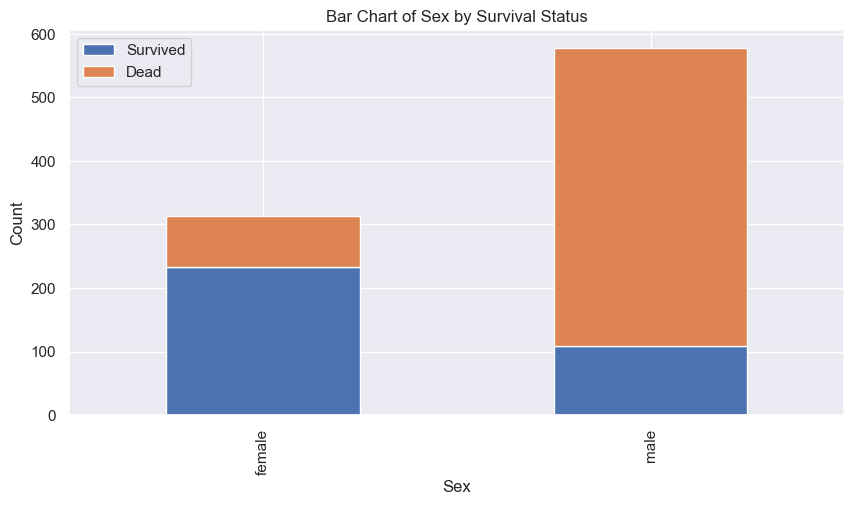

In [105]:
bar_chart('Sex')

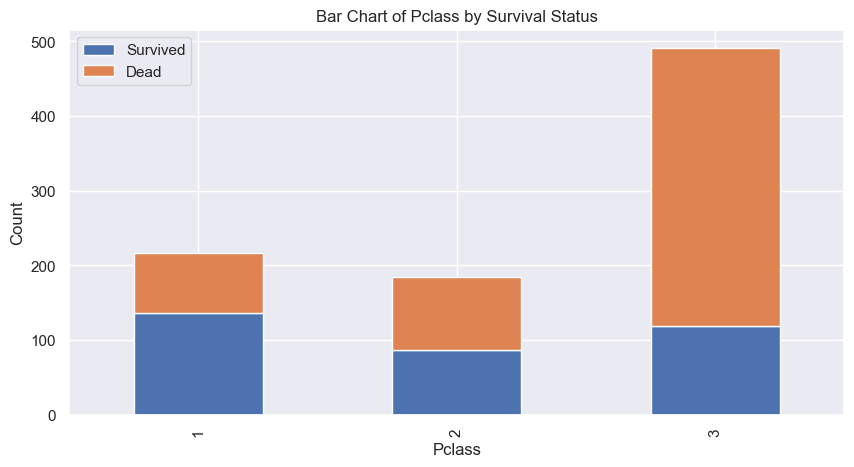

In [106]:
bar_chart('Pclass')

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_chart2(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()

    df = pd.DataFrame({
        'Survived': survived,
        'Dead': dead
    }).fillna(0) 
    
    df = df.T  
    
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'Bar Chart of {feature} by Survival Status')
    plt.xlabel('Survival Status')
    plt.ylabel('Count')
    plt.xticks(ticks=range(len(df)), labels=['Survived', 'Dead'])
    plt.legend(title=feature)
    
    plt.show()


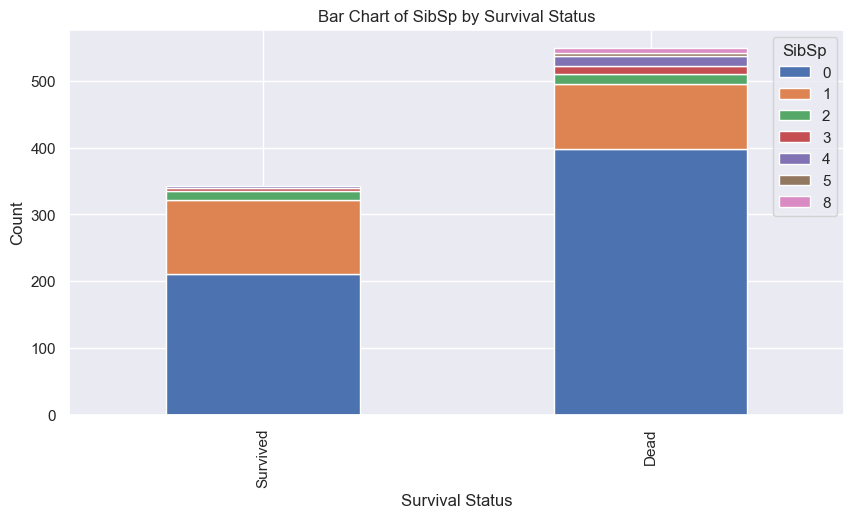

In [108]:
bar_chart2('SibSp')

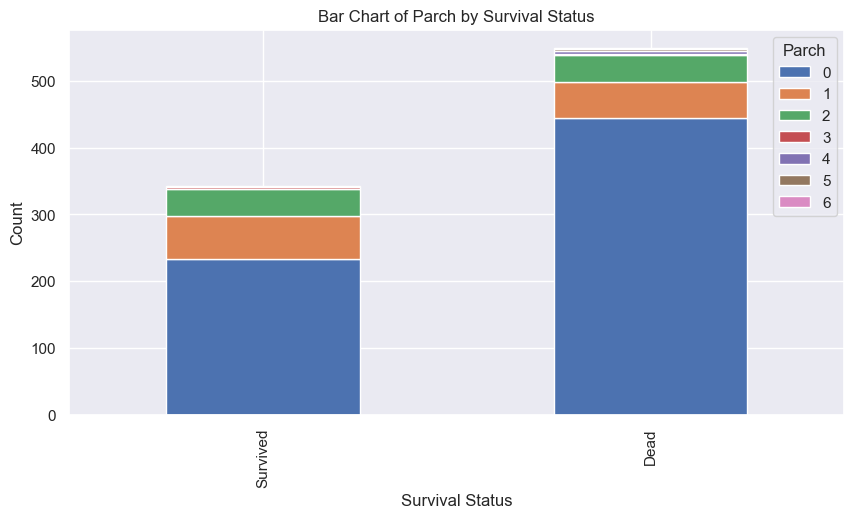

In [109]:
bar_chart2('Parch')

* 가설1: 여성이 남성보다 생존률이 높음
* 가설2: 1등급 좌석이 생존률이 높고, 3등급 좌석이 생존률이 낮
* 가설3: 혼자 탑승한 경 생존자 수가 적음.
* 가설4: 가족과 함꼐 탑승한 사람이 생존자 수가 더 많음

# *데이터 전처리*


## 1.name

In [110]:
combined = [train, test]
print([type(dataset) for dataset in combined])


[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>]


In [111]:
for dataset in combined:
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [112]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [113]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":4, "Rev":4, "Mlle":4, "Major":4, "Col":4, "Countess":4, "Capt":4, "Ms":4, "Sir":4, "Lady":4, "Jonkheer":4, "Mme":4, "Don":4}

for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


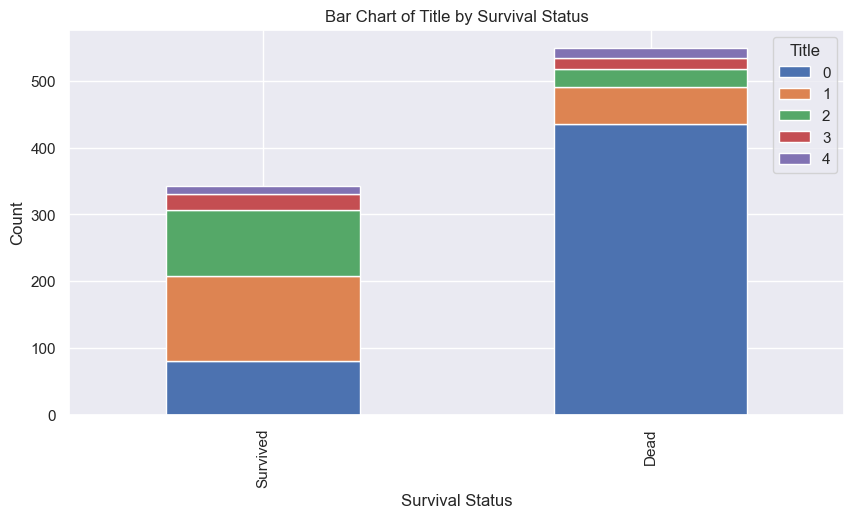

In [115]:
bar_chart2('Title')

## 2.성별

In [116]:
sex_mapping= {"male":0, "female":1}
for dataset in combined:
    dataset['Sex_m']= dataset['Sex'].map(sex_mapping)

In [117]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_m
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,4,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0,0


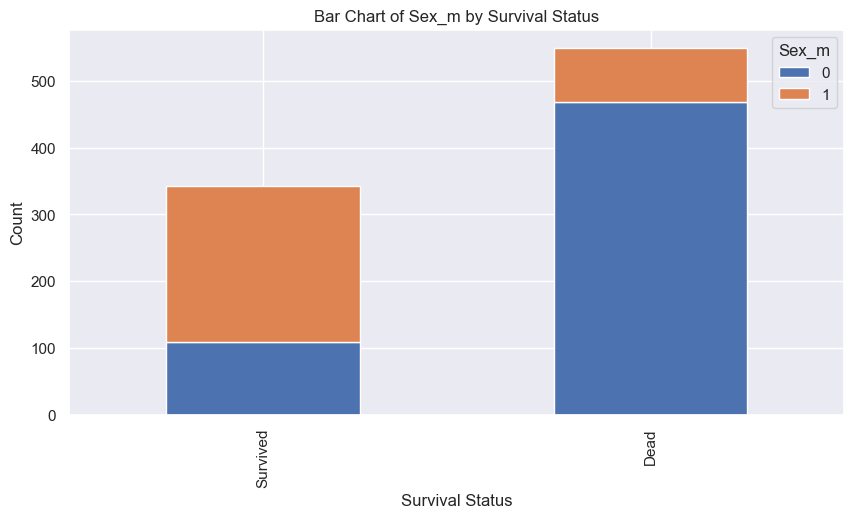

In [118]:
bar_chart2('Sex_m')

## 3.나이

나이 결측값 채우기. 이름의 title 활용, 대푯값으로 평균 입력

In [119]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

C:\Users\leehy\AppData\Local\Temp\ipykernel_14220\1046323306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
C:\Users\leehy\AppData\Local\Temp\ipykernel_14220\1046323306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [120]:
train['Age'] = train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


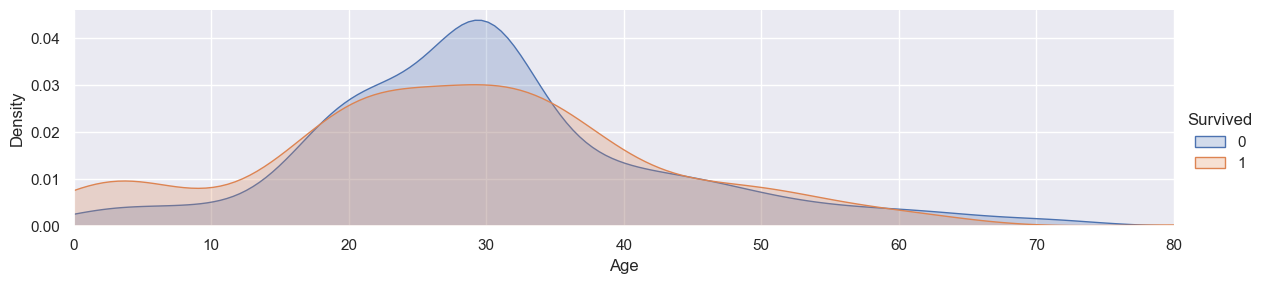

In [121]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

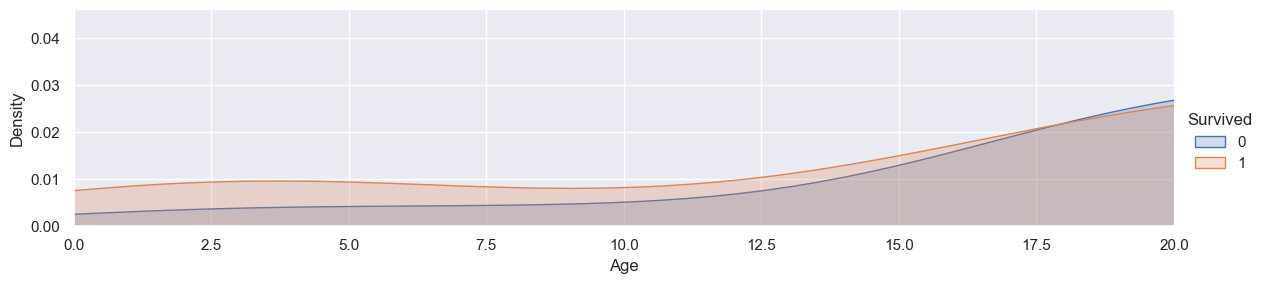

In [122]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)


0~20살 생존 빈도 그래프, 생존자가 더 많음

C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(20.0, 30.0)

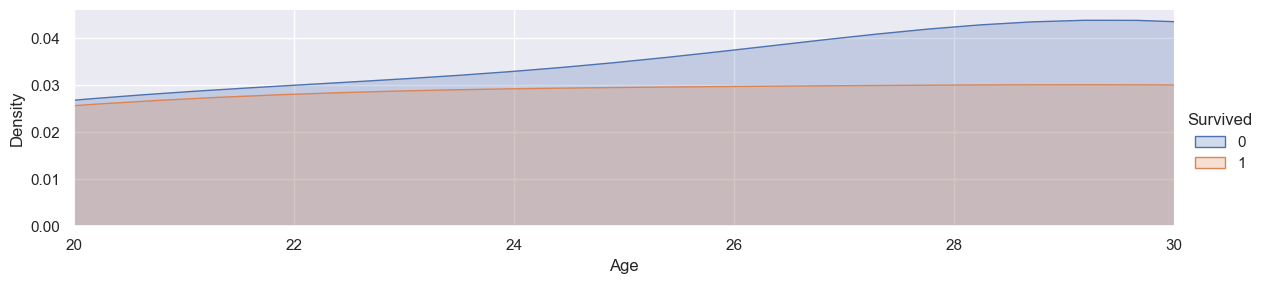

In [123]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

20~30살 생존 빈도 그래프. 나이가 많아질수록 사망자가 많아짐

C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(30.0, 40.0)

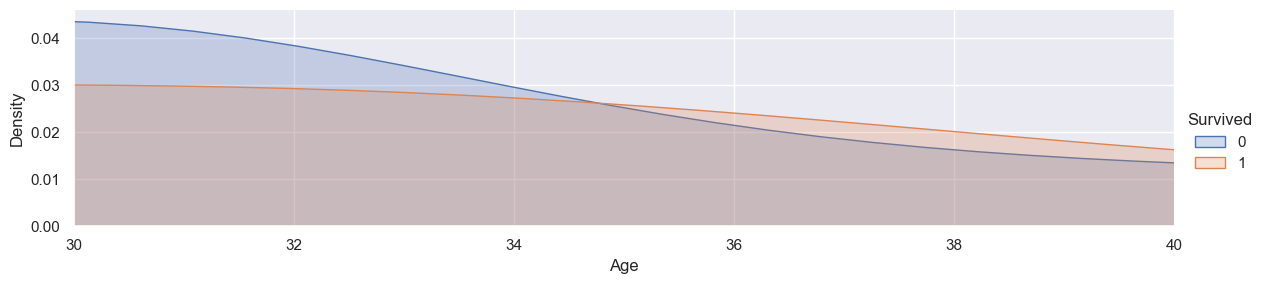

In [124]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

30~40살 생존 빈도 그래프. 나이가 적을수록 생존자가 더 적음

**binning**

나이 매핑
* 0~19세 : 0
* 20~34세: 1 
* 35~65세: 2
* 65세 이상: 3

In [125]:
for dataset in combined:
    dataset.loc[dataset['Age'] <= 10, 'Age_m']=0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 19), 'Age_m']=1
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 29), 'Age_m']=2
    dataset.loc[(dataset['Age'] > 29) & (dataset['Age'] <= 39), 'Age_m']=3
    dataset.loc[(dataset['Age'] > 39) & (dataset['Age'] <= 49), 'Age_m']=4
    dataset.loc[(dataset['Age'] > 49) & (dataset['Age'] <= 59), 'Age_m']=5
    dataset.loc[dataset['Age'] >= 60, 'Age_m']=6



In [126]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_m,Age_m
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,3.0
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,0,0,3.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,5.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3,0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,1,1.0


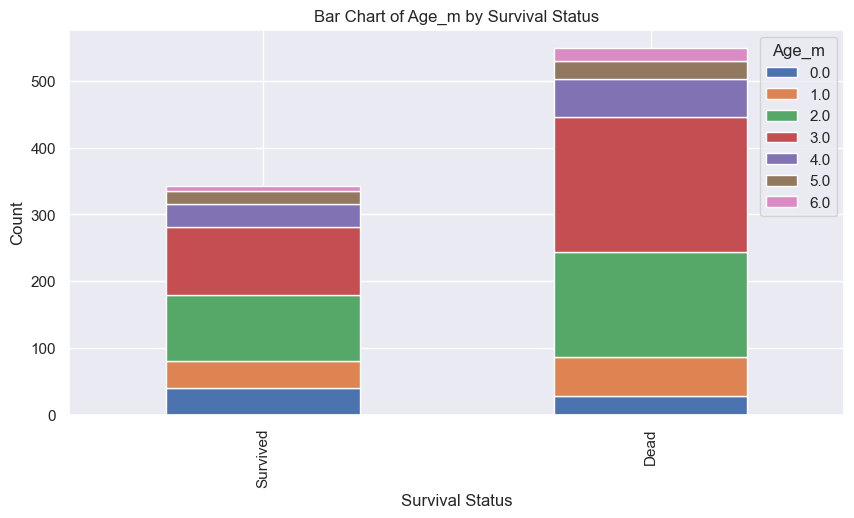

In [127]:
bar_chart2('Age_m')

* 10대 미만: 생존 > 사망
* 10대: 생존 < 사망
* 20대: 생존 < 사망
* 30대: 생존 < 사망
* 40대: 생존 < 사망
* 50대: 생존 < 사망
* 60대 이상: 생존 < 사망

## 4. embarked

탑승 지역, 좌석 등급 교차분석



<Axes: >

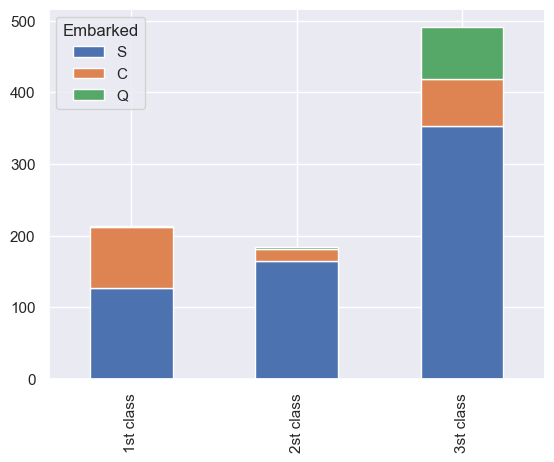

In [128]:
pc1 = train[train['Pclass']==1]['Embarked'].value_counts()
pc2 = train[train['Pclass']==2]['Embarked'].value_counts()
pc3 = train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([pc1, pc2, pc3])
df.index=['1st class', '2st class', '3st class']
df.plot(kind='bar', stacked=True)

In [129]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [130]:
train_embarked_ratio = train.groupby('Pclass')['Embarked'].value_counts(normalize=True).unstack()
test_embarked_ratio = test.groupby('Pclass')['Embarked'].value_counts(normalize=True).unstack()

print(train_embarked_ratio)

Embarked         C         Q         S
Pclass                                
1         0.397196  0.009346  0.593458
2         0.092391  0.016304  0.891304
3         0.134420  0.146640  0.718941


In [131]:
print(test_embarked_ratio)

Embarked         C         Q         S
Pclass                                
1         0.523364  0.009346  0.467290
2         0.118280  0.043011  0.838710
3         0.160550  0.188073  0.651376


In [132]:
import numpy as np

def fill_embarked(row, embarked_ratio):
    if pd.isnull(row['Embarked']):
        pclass = row['Pclass']
        return np.random.choice(['C', 'Q', 'S'], p=embarked_ratio.loc[pclass].values)
    else:
        return row['Embarked']

train['Embarked'] = train.apply(lambda row: fill_embarked(row, train_embarked_ratio), axis=1)
test['Embarked'] = test.apply(lambda row: fill_embarked(row, test_embarked_ratio), axis=1)



* Q : 낮은 등급일수록 많음.
* S : 모든 등급에서 사람이 많음

In [133]:
embarked_mapping={"S":0,"C":1, "Q":2}
for dataset in combined:
    dataset['Embarked_m'] = dataset['Embarked'].map(embarked_mapping)

In [134]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_m,Age_m,Embarked_m
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,2.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,3.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,3.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,3.0,0


In [135]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Sex_m            0
Age_m            0
Embarked_m       0
dtype: int64

## 5.Fare (티켓 가격)

좌석 등급별 중앙값으로 결측값 넣음

In [136]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

C:\Users\leehy\AppData\Local\Temp\ipykernel_14220\1566610955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\leehy\AppData\Local\Temp\ipykernel_14220\1566610955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


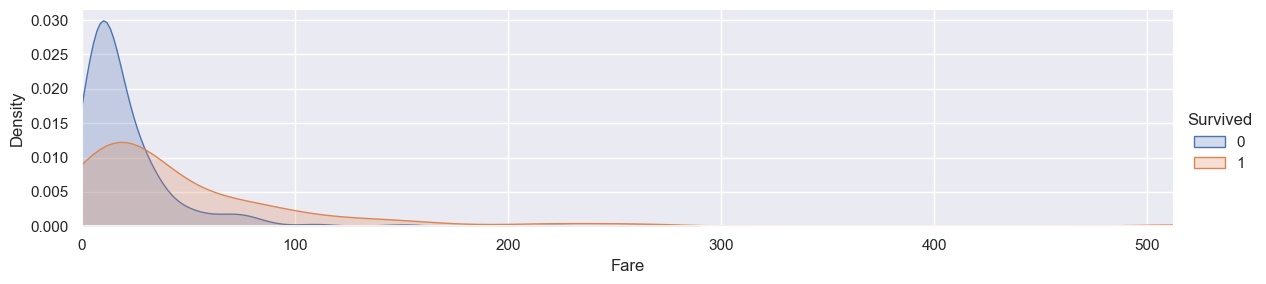

In [137]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()


C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

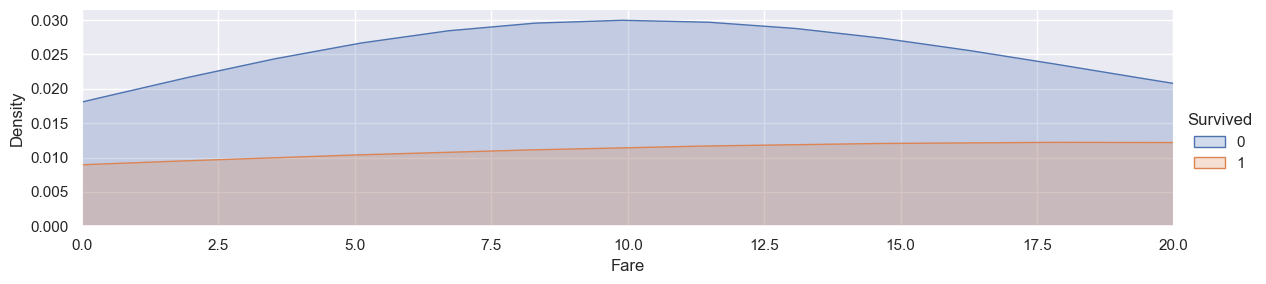

In [138]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 30.0)

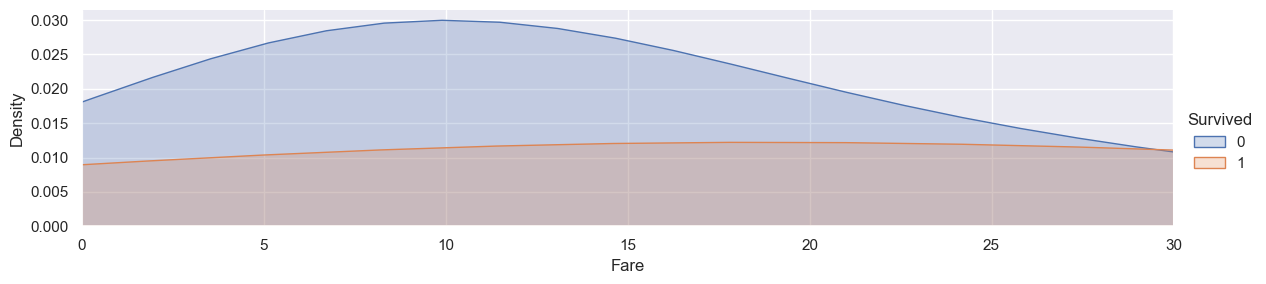

In [139]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

In [140]:
for dataset in combined:
    dataset.loc[dataset['Fare']<=17, 'Fare_m']=0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare'] <= 30), 'Fare_m']=1
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare'] <= 100), 'Fare_m']=2
    dataset.loc[dataset['Fare']>100, 'Fare_m']=3
    

In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_m,Age_m,Embarked_m,Fare_m
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,2.0,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,3.0,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,2.0,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,3.0,0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,3.0,0,0.0


##  6. cabin 

In [142]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

<Axes: >

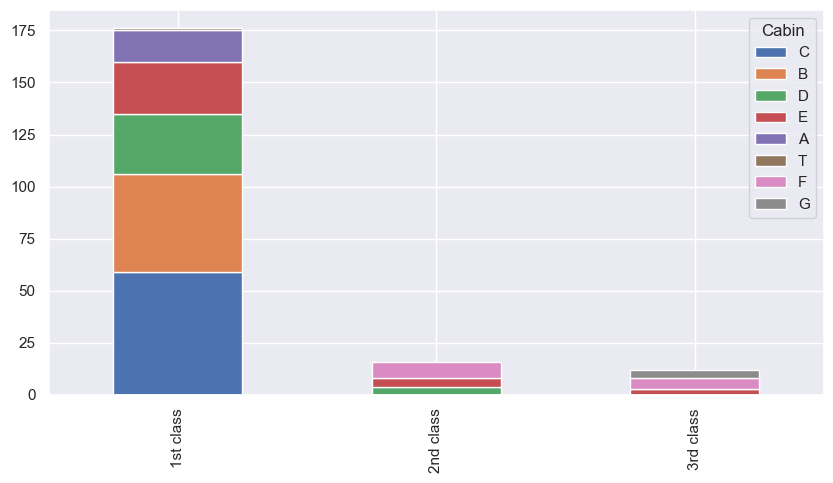

In [143]:
for dataset in combined:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

pc1 = train[train['Pclass']==1]['Cabin'].value_counts()
pc2 = train[train['Pclass']==2]['Cabin'].value_counts()    
pc3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([pc1, pc2, pc3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [144]:
cabin_mapping = {"A": 0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8} #피쳐 스케일링
for dataset in combined:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


C:\Users\leehy\AppData\Local\Temp\ipykernel_14220\4141077744.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
C:\Users\leehy\AppData\Local\Temp\ipykernel_14220\4141077744.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [145]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Sex_m          0
Age_m          0
Embarked_m     0
Fare_m         0
dtype: int64

## 7.family size

In [146]:
train["FamilySize"] = train["SibSp"] + train["Parch"] +1
test["FamilySize"] = test["SibSp"] + test["Parch"] +1

C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

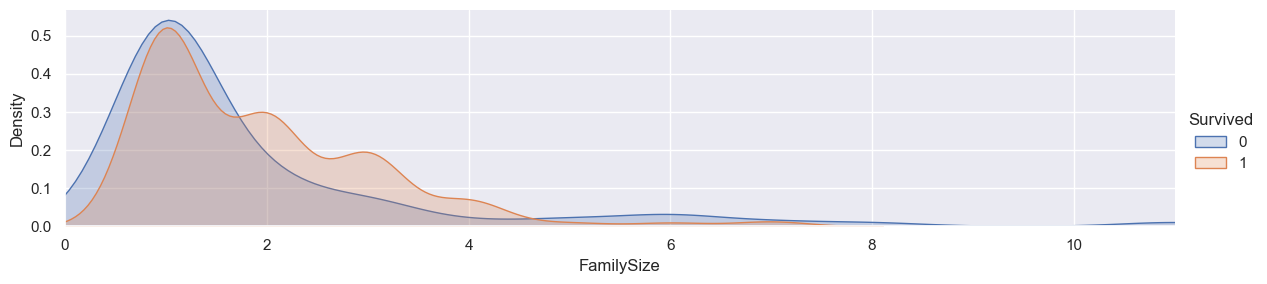

In [147]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

가족이 함께 탑승하지 않았을 경우 사망자 수가 더많지만, 가족이 있을수록 생존자가 더 많음


매핑
* 1명(본인 혼자) : 0
* 2명(본인+가족 1명) :0.4
* 3명: 0.8 
* ...
* 10명: 3.6
* 11명: 4

피쳐의 스케일링으로, 본래보다 작은 단위의 숫자 할당.


In [148]:
family_mapping={1:0, 2:0.4, 3:0.8, 4:1.2,5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in combined:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_m,Age_m,Embarked_m,Fare_m,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S,0,0,2.0,0,0.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,2,1,3.0,1,2.0,0.4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,1,1,2.0,0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,2,1,3.0,0,2.0,0.4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S,0,0,3.0,0,0.0,0.0


In [149]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_m,Age_m,Embarked_m,Fare_m,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,2.0,Q,0.0,0,3.0,2,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2.0,S,2.0,1,4.0,0,0.0,0.4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,2.0,Q,0.0,0,6.0,2,0.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2.0,S,0.0,0,2.0,0,0.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2.0,S,2.0,1,2.0,0,0.0,0.8


In [150]:
dropdata = ['SibSp','Parch','Sex','Age','Embarked','Fare', 'Ticket']
train_data = train.drop(dropdata, axis=1)
test_data = test.drop(dropdata, axis=1)

In [153]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Cabin,Title,Sex_m,Age_m,Embarked_m,Fare_m,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",2.0,0,0,2.0,0,0.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.8,2,1,3.0,1,2.0,0.4
2,3,1,3,"Heikkinen, Miss. Laina",2.0,1,1,2.0,0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.8,2,1,3.0,0,2.0,0.4
4,5,0,3,"Allen, Mr. William Henry",2.0,0,0,3.0,0,0.0,0.0
5,6,0,3,"Moran, Mr. James",2.0,0,0,3.0,2,0.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",1.6,0,0,5.0,0,2.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,0,0.0,0,1.0,1.6
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2.0,2,1,2.0,0,0.0,0.8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1.8,2,1,1.0,1,2.0,0.4
